<a href="https://colab.research.google.com/github/ShynPham/food-vision-detection-/blob/main/foodvision_v2_with_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Object Detection Training with YoloS

# Part 1: The brain
This notebook is written as a part of the brain for a school project that required a `brain` and this model is serve as the `brain` of this operation.

The objected for this model is to detect a food object, detect what kind of food it is and how many cals/fat/... would it contains in the foods.

The steps to achieves this goal are:

* Gather two datasets:
  * A dataset of images and annotations for food
  * A datasets of food classification for nutritions
* Export the datasets into YOLO model
* Trains YOLO model to recognized the custome datasets
* Make sure to log the weights and bias of the model
* Evaluated the model
* Deploy into hugging face

---

# Part 2:  WIP

After finishing with the brain, we will figured out how to deploy and interface it into a mobile developement application

**WIP**

# 1. Download yolov8 pretrained model



In [ ]:
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
!pip install -e .

Cloning into 'ultralytics'...
remote: Enumerating objects: 69445, done.
remote: Counting objects: 100% (1323/1323), done.
remote: Compressing objects: 100% (623/623), done.
remote: Total 69445 (delta 1112), reused 707 (delta 700), pack-reused 68122 (from 3)
Receiving objects: 100% (69445/69445), 36.95 MiB | 9.68 MiB/s, done.
Resolving deltas: 100% (51861/51861), done.
/content/ultralytics
Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.203-0.editable-py3-none-any.whl size=23145 sha256=bc4839418e06166fd8da578d16e2dc6b0d1212ef8a178c5fb0674ff7334a4fb2
  Stored in directory: /tmp/pip-ephem-wheel-cache-bp_x5kl9/wheels/60/e0/59/e2f034f296abbdca5c21e3f5be76b9ca685f13c7bd17f8b58c
S

# 2. Getting the datasets

Since the datasets is download from roboflow(thansk god), the datasets will be download in the yolo format save us so MUCH time

In [ ]:
# Dataset download from

!pip install roboflow

from roboflow import Roboflow
from google.colab import userdata

# Access your API key from Google Colab secrets
rf = Roboflow(api_key=userdata.get('ROBO_FOLOW'))
project = rf.workspace("food-becxj").project("final-complete-food")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 113.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Final-Complete-Food-1 in yolov8:: 100%|██████████| 186682/186682 [00:23<00:00, 8024.31it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 3. Understanding the dataset

Like a wise man said, in order to shoot the ball into the goal, we need understand the ball first.

Same thing with the model, we need to understand what is the datasets look like first. But since this is a pre-model datasets, everything is ready to use.

In [ ]:
# Define the dataset path
dataset_path = dataset.location

import os
# list of the contents of the downloaded datasets
print("Contents of the downloaded datasets:")
print(os.listdir(dataset_path))

Contents of the downloaded datasets:
['data.yaml', 'README.roboflow.txt', 'train', 'test', 'README.dataset.txt', 'valid']


In [ ]:
#  Print the content of data.yaml file
# define data.yaml path
data_yaml_path = os.path.join(dataset_path, 'data.yaml')
print("Content of data.yaml file:")
with open(data_yaml_path, 'r') as f:
    print(f.read())

# Count the number of images and label in train and valid directories
train_images_count = len(os.listdir(os.path.join(dataset_path, 'train/images')))
train_labels_count = len(os.listdir(os.path.join(dataset_path, 'train/labels')))
valid_images_count = len(os.listdir(os.path.join(dataset_path, 'valid/images')))
valid_labels_count = len(os.listdir(os.path.join(dataset_path, 'valid/labels')))

# Print out the content
print(f"Number of images in train/images: {train_images_count}")
print(f"Number of labels in train/labels: {train_labels_count}")
print(f"Number of images in valid/images: {valid_images_count}")
print(f"Number of labels in valid/labels: {valid_labels_count}")

Content of data.yaml file:
names:
- Apple
- Apple Pie
- Avocado
- Banana
- Basil Rice
- Beetroot
- Bell Pepper
- Bread
- Broccoli
- Bualoy
- Burger
- Cabbage
- Cake
- Carrot
- Cauliflower
- Cheese
- Cheesecake
- Chicken
- Chicken Rice
- Coconut
- Coke
- Cookie
- Corn
- Crispy Pork Kale
- Croissant
- Donut
- Egg
- Eggplant
- Fig
- Fish
- French Fries
- Grape
- Grapefruit
- Green Curry
- Grilled Chicken
- Hamburger
- Homok
- Hot Dog
- Ice Cream
- Jackfruit
- Japanese-style-pancake
- Jok
- Juice
- Khao kha moo
- Laab
- Laadna
- Lemon
- Lettuce
- Macaron
- Mango
- Muffin
- Mushroom
- Namprig
- Omelette
- Orange
- Padthai
- Pancake
- Papaya Salad
- Pasta
- Peach
- Pear
- Peas
- Pineapple
- Pizza
- Pomegranate
- Popcorn
- Pork Satay
- Potato
- Pretzel
- Pumpkin
- Radish
- Rice
- Salad
- Salmon
- Sandwich
- Shrimp
- Spinach
- Steak
- Strawberry
- Sukee
- Sweet Potato
- Tiramisu
- Tom Yum
- Tomato
- Waffle
- Watermelon
- Zucchini
- alooparatha-chapati
- baklava
- bakso
- bamia
- beans
- beef-c

summary: 214 classes of food with 79341 number of images to train and 9329 images to validation

## 3.1 Checking for unbalance datasets.

What is unbalance dataset?
* Unbalance datasets means sometimes, some classes have far more samples(bounding boxes) than other, which can bias the model. That why we need to check for unbalancing and here is how to do it.

1. Count Annotations per classes
  * Since the datasets was downloaded in yolo format, each YOLO label file(`.txt`) contains lines like:

    ` class_id x_center y_center width height`

    ***Rule is: if one class have 10x more samples, then it is a RED FLAG***

2. Visualizez the distributions
  * By plotting a simple bar charts of countes per class, we can tell the datasets is unbalances or not

3. Check images-level distributions
  * Sometimes, imbalance isn't just about bounding box, but also in how often a class appears in images
    > Examples: if there is two class: `apple` and `orange`, if `apple` appear 90% and `orange` only appear 10%, then it is a readflag

Final Note: Rule of thumbs is, if the largest class have >5x more samples than the smallest, you should considere it imbalances, the more extreme the ratio, the more bias you get.

## 3.1.1 Count Annotations per class

In [ ]:
import os
from collections import Counter

# labels_dir = os.path.join(dataset_path, 'train')
labels_dir = os.path.join(dataset_path, 'train', 'labels')

counts = Counter()

# for file in os.listdir(labels_dir):
for file in os.listdir(labels_dir): # Iterate through files in the labels directory
  if file.endswith('.txt'): # Process only text files
    with open(os.path.join(labels_dir, file), 'r') as f:
      for line in f:
        counts[int(line.split()[0])] += 1

print(counts)

Counter({54: 19471, 0: 10824, 83: 9304, 78: 8797, 31: 8733, 3: 6449, 71: 5810, 69: 4044, 13: 4030, 58: 3501, 112: 3061, 30: 3004, 8: 2916, 86: 2826, 63: 2815, 6: 2584, 85: 2568, 67: 2503, 62: 2438, 136: 2280, 46: 2276, 10: 2191, 51: 2135, 126: 2071, 177: 2008, 60: 1878, 87: 1875, 59: 1869, 156: 1863, 128: 1763, 140: 1605, 213: 1583, 15: 1458, 2: 1406, 208: 1403, 75: 1368, 130: 1364, 12: 1323, 107: 1321, 19: 1312, 106: 1262, 50: 1223, 21: 1218, 210: 1208, 49: 1148, 161: 1146, 7: 1139, 110: 1121, 139: 1102, 47: 1089, 169: 1028, 160: 1028, 116: 1022, 178: 990, 35: 967, 64: 945, 113: 938, 197: 925, 94: 871, 76: 870, 163: 855, 17: 851, 100: 848, 105: 814, 186: 801, 117: 796, 32: 789, 119: 777, 24: 769, 115: 759, 211: 754, 202: 743, 97: 742, 127: 737, 56: 716, 48: 701, 159: 690, 11: 689, 38: 661, 170: 648, 84: 647, 101: 638, 143: 594, 175: 594, 179: 580, 99: 572, 42: 559, 98: 554, 65: 544, 74: 543, 70: 529, 73: 525, 109: 519, 184: 513, 39: 479, 77: 477, 91: 468, 37: 466, 162: 460, 95: 454, 8

## 3.1.2 Visualize class distributions


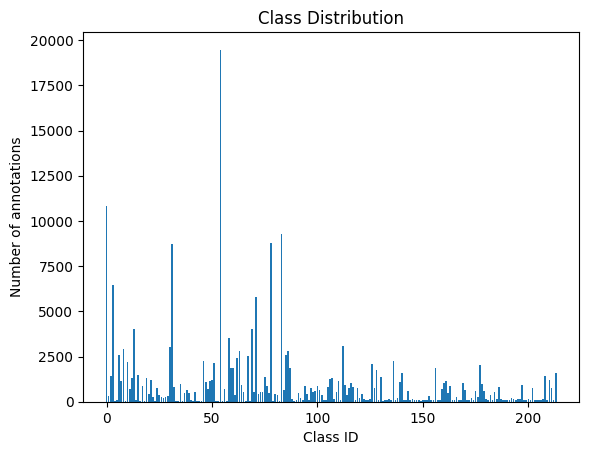

In [ ]:

import matplotlib.pyplot as plt

plt.bar(counts.keys(), counts.values())
plt.xlabel('Class ID')
plt.ylabel('Number of annotations')
plt.title('Class Distribution')
plt.show()

In [ ]:
# Find the largest count annotation
largest_count = max(counts.values())
# Find the smallest count annotaion
smallest_count = min(counts.values())

# Print the counts
print(f"Largest annotations count: {largest_count}")
print(f"Smallest annotations count: {smallest_count}")

# Check if the largest count is more than 5x the smallest count
if largest_count > 5 * smallest_count:
  print("The dataset is unbalanced based on the 5x rule.")
else:
  print("The dataset is relatively balanced based on the 5x rule.")

Largest annotations count: 19471
Smallest annotations count: 20
The dataset is unbalanced based on the 5x rule.


From the look of it, we can tell this datasets is pretty unbalances, so what can we do to help these unbalancing?

https://y-t-g.github.io/tutorials/yolo-class-balancing/

## Weights Dataloader

In [ ]:
from ultralytics import YOLO
from ultralytics.data.dataset import YOLODataset
import ultralytics.data.build as build
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
class YOLOWeightedDataset(YOLODataset):
    def __init__(self, *args, mode="train", **kwargs):
        """
        Initialize the WeightedDataset.

        Args:
            class_weights (list or numpy array): A list or array of weights corresponding to each class.
        """

        super(YOLOWeightedDataset, self).__init__(*args, **kwargs)

        self.train_mode = "train" in self.prefix

        # You can also specify weights manually instead
        self.count_instances()
        class_weights = np.sum(self.counts) / self.counts

        # Aggregation function
        self.agg_func = np.mean

        self.class_weights = np.array(class_weights)
        self.weights = self.calculate_weights()
        self.probabilities = self.calculate_probabilities()

    def count_instances(self):
        """
        Count the number of instances per class

        Returns:
            dict: A dict containing the counts for each class.
        """
        self.counts = [0 for i in range(len(self.data["names"]))]
        for label in self.labels:
            cls = label['cls'].reshape(-1).astype(int)
            for id in cls:
                self.counts[id] += 1

        self.counts = np.array(self.counts)
        self.counts = np.where(self.counts == 0, 1, self.counts)

    def calculate_weights(self):
        """
        Calculate the aggregated weight for each label based on class weights.

        Returns:
            list: A list of aggregated weights corresponding to each label.
        """
        weights = []
        for label in self.labels:
            cls = label['cls'].reshape(-1).astype(int)

            # Give a default weight to background class
            if cls.size == 0:
              weights.append(1)
              continue

            # Take mean of weights
            # You can change this weight aggregation function to aggregate weights differently
            weight = self.agg_func(self.class_weights[cls])
            weights.append(weight)
        return weights

    def calculate_probabilities(self):
        """
        Calculate and store the sampling probabilities based on the weights.

        Returns:
            list: A list of sampling probabilities corresponding to each label.
        """
        total_weight = sum(self.weights)
        probabilities = [w / total_weight for w in self.weights]
        return probabilities

    def __getitem__(self, index):
        """
        Return transformed label information based on the sampled index.
        """
        # Don't use for validation
        if not self.train_mode:
            return self.transforms(self.get_image_and_label(index))
        else:
            index = np.random.choice(len(self.labels), p=self.probabilities)
            return self.transforms(self.get_image_and_label(index))

 ### [Monkey patch method](https://www.geeksforgeeks.org/python/monkey-patching-in-python-dynamic-behavior/)


In Python, Monkey Patching refers to dynamically modifying or extending behavior of a class or module at runtime. This allows developers to change how functions, methods or classes behave without altering original source code.



In [ ]:
# monkey patch method
build.YOLODataset = YOLOWeightedDataset

# 4. Train

Since we just got two different dataloaders, we will train and compare the results on both of them

## 4.1 Train without weights dataloaders



In [ ]:
# # Revert to the original dataloaders
# build.YOLODataset = YOLODataset

In [ ]:
# model = YOLO("yolov8n.pt")

In [ ]:
# # Revert to the original dataloaders
# build.YOLODataset = YOLODataset

# model = YOLO("yolov8n.pt")
# results = model.train(data=os.path.join(dataset_path, "data.yaml"), epochs=50)



In [ ]:
# After training, copy the results directory to Google Drive
import shutil

# The path to the results is typically stored in results.save_dir or similar
# We need to confirm the exact attribute after training runs
# For now, let's assume the results are saved in 'runs/detect/train'
# You might need to adjust this path based on the actual output of the training

# Example of how to copy (you will need to verify the source path)
# source_dir = results.save_dir # This is a placeholder, verify the actual attribute
# destination_dir = '/content/drive/MyDrive/yolov8_default_train'

# print(f"Copying training results from {source_dir} to {destination_dir}")
# shutil.copytree(source_dir, destination_dir)
# print("Copying complete.")

In [ ]:
# Verify the type of dataset used.
model.trainer.train_loader.dataset

### Trained with weight dataloaders

In [ ]:
build.YOLODataset = YOLOWeightedDataset

In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
weight_results = model.train(data=os.path.join(dataset_path, "data.yaml"), epochs=50)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ultralytics/Final-Complete-Food-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

In [ ]:
# evaluate the model
metrics = model.val()

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,375,266 parameters, 0 gradients, 9.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1279.8±417.7 MB/s, size: 47.4 KB)
val: Scanning /content/ultralytics/Final-Complete-Food-1/valid/labels.cache... 9329 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 9329/9329 14.7Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 584/584 8.1it/s 1:12
                   all       9329      23860      0.622      0.581      0.616      0.459
                 Apple        353       1247      0.643      0.108      0.288      0.212
             Apple Pie         33         34      0.659      0.676      0.746      0.623
               Avocado         59        144      0.854      0.576      0.708      0.442
                Banana        333        736      0.643      0.213      0.324      0.219
            Basil 

In [ ]:
# zip the results file and then download it
import zipfile

dest_file = '/content/ultralytics/runs/detect/train/weights/'

with zipfile.ZipFile('results.zip', 'w') as zipf:
    for root, dirs, files in os.walk(dest_file):
        for file in files:
            zipf.write(os.path.join(root, file))

from google.colab import files
files.download('results.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Verify the type of dataset used.
model.trainer.train_loader.dataset

# Check class balances


image 1/1 /content/ultralytics/Final-Complete-Food-1/test/images/chapati_136_jpg.rf.b54c96a23c8417d30f096ae9b49e9532.jpg: 640x640 (no detections), 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


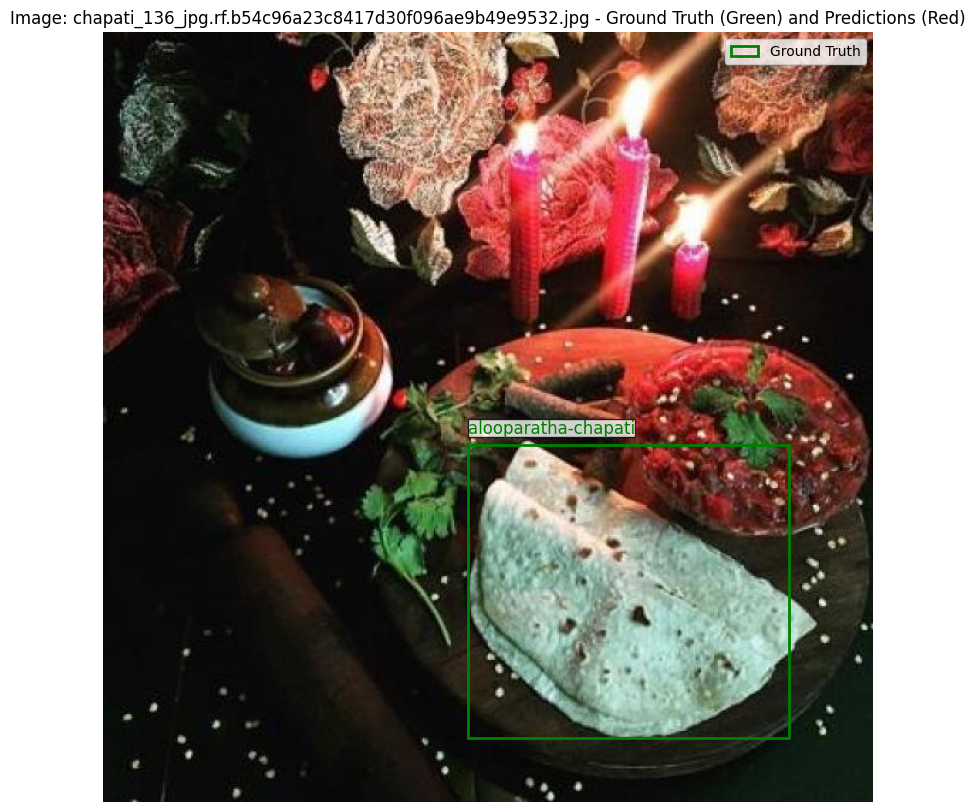


image 1/1 /content/ultralytics/Final-Complete-Food-1/test/images/036bab4135f17354_jpg.rf.73f57bc86d3a03eef9a9356265585253.jpg: 640x640 1 Watermelon, 8.3ms
Speed: 1.6ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


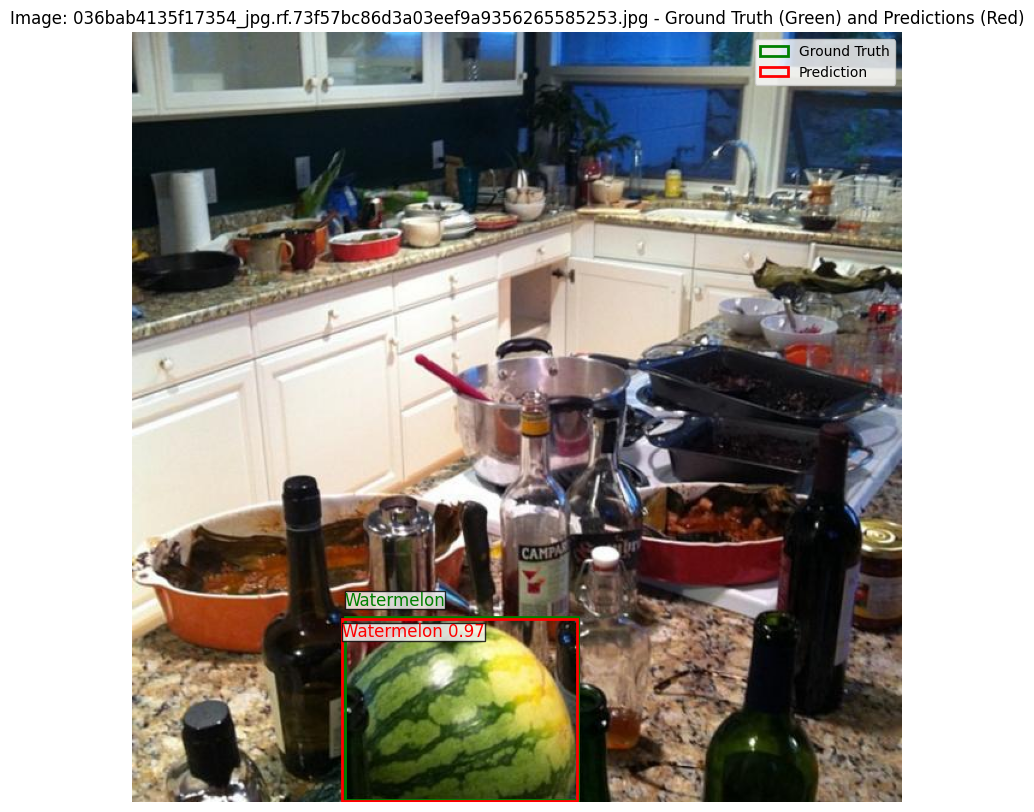


image 1/1 /content/ultralytics/Final-Complete-Food-1/test/images/9f1fa6910082aa06_jpg.rf.8e6764993fcc879c53380a21eff71c2a.jpg: 640x640 1 Apple, 8.4ms
Speed: 1.6ms preprocess, 8.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


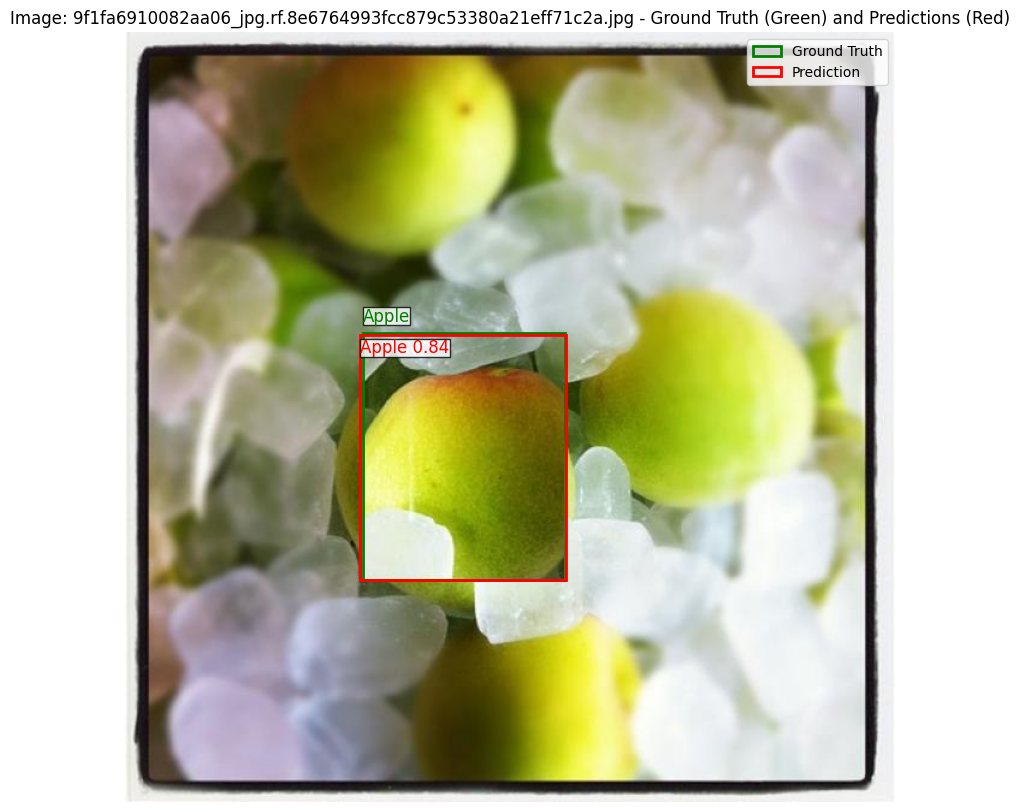


image 1/1 /content/ultralytics/Final-Complete-Food-1/test/images/vada_insta_970_jpg.rf.516b06f282ab561fabfcf9fe00a70674.jpg: 640x640 1 biriyani, 1 dalmakhani, 10.2ms
Speed: 1.6ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



image 1/1 /content/ultralytics/Final-Complete-Food-1/test/images/9882_jpg.rf.57a3321d251e0f6b21b9c53068771035.jpg: 640x640 (no detections), 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


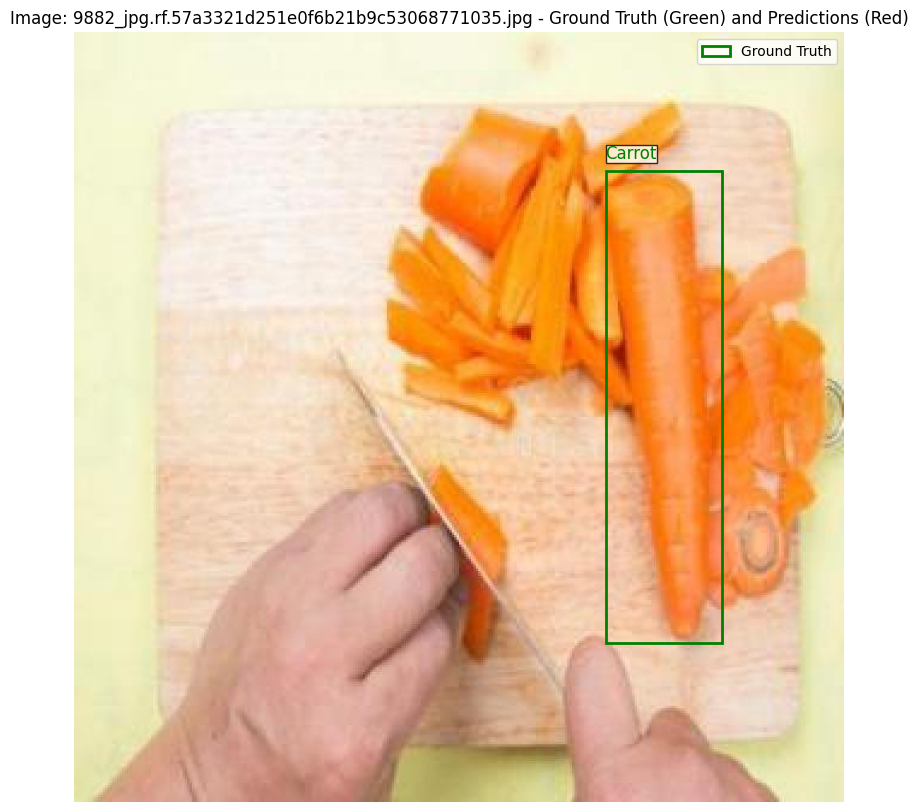


image 1/1 /content/ultralytics/Final-Complete-Food-1/test/images/b4685cba12f50f26_jpg.rf.98debf4284ec78354f1a4ae8e309fa12.jpg: 640x640 1 Watermelon, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



image 1/1 /content/ultralytics/Final-Complete-Food-1/test/images/Burger_Food_100_90_degree_png_jpg.rf.d5cd4b336e3cc6df6ab87b1ceac3e2e5.jpg: 640x640 1 Burger, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


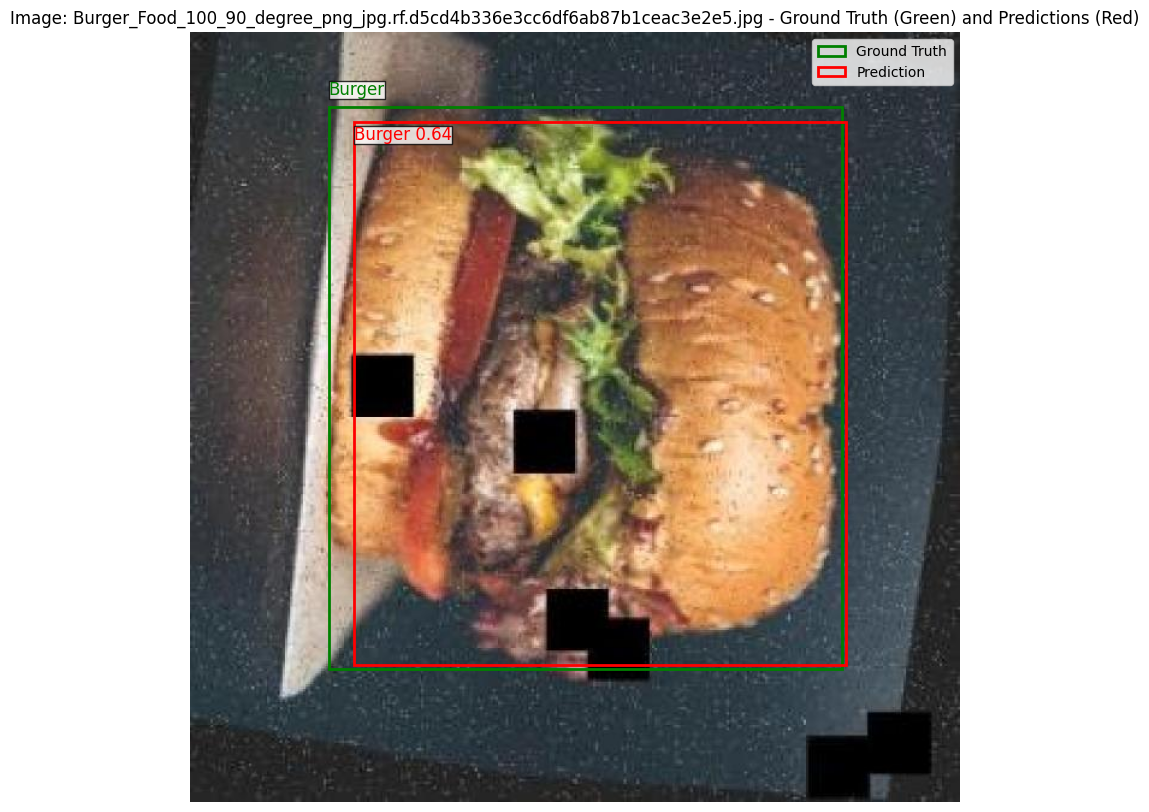


image 1/1 /content/ultralytics/Final-Complete-Food-1/test/images/298_jpg.rf.6f396ffaf44045e74a9acf78e7d09d7f.jpg: 640x640 1 potage, 8.4ms
Speed: 1.6ms preprocess, 8.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


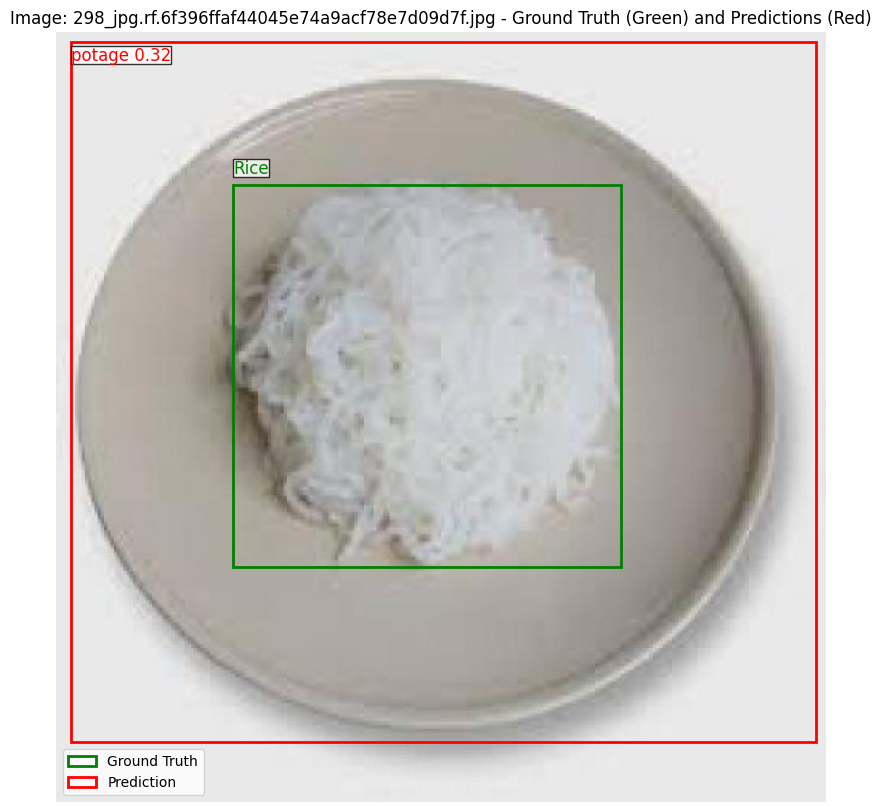


image 1/1 /content/ultralytics/Final-Complete-Food-1/test/images/1795_jpg.rf.0080e2fdb247627c13c3125e6815016f.jpg: 640x640 1 Pomegranate, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



image 1/1 /content/ultralytics/Final-Complete-Food-1/test/images/7786_jpg.rf.89b9b935b34234091bea2dd56ce303f8.jpg: 640x640 (no detections), 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


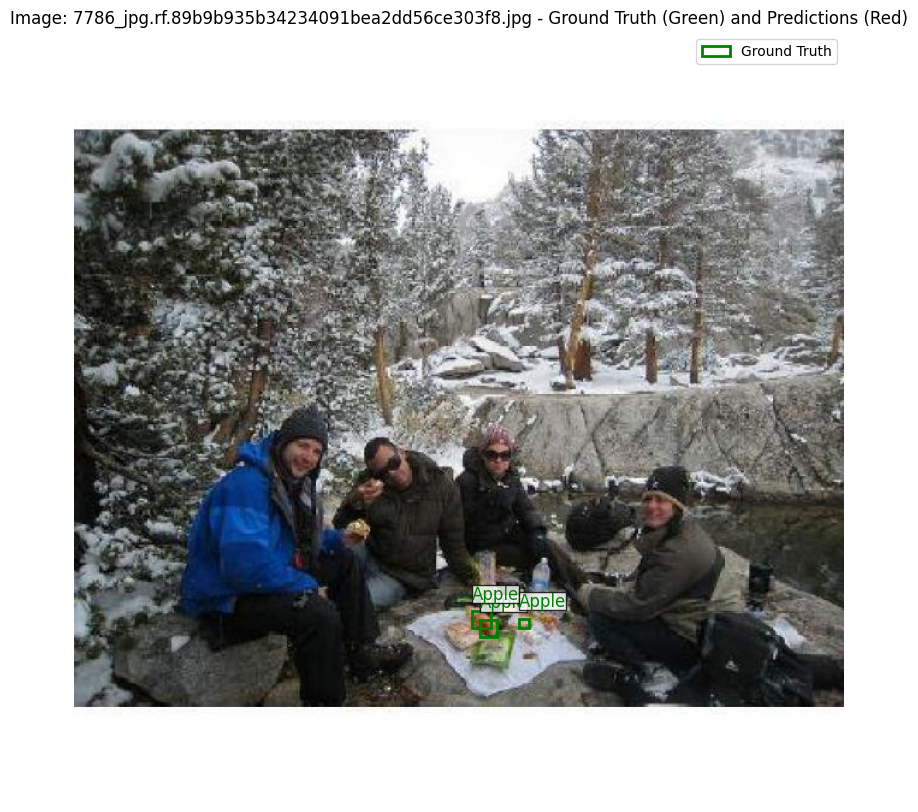

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

test_images_path = os.path.join(dataset_path, 'test', 'images')
# Select 10 random images from the test set
random_image_filenames = random.sample(os.listdir(test_images_path), 10)

for random_image_filename in random_image_filenames:
    random_image_path = os.path.join(test_images_path, random_image_filename)

    # Run inference with the trained model
    results = model(random_image_path)

    # Load the original image
    img = mpimg.imread(random_image_path)

    # Create a figure and axes to display the image
    fig, ax = plt.subplots(1, figsize=(10, 10)) # Adjust figure size for better visualization
    ax.imshow(img)

    # Load the ground truth labels for the image
    label_path = os.path.join(dataset_path, 'test', 'labels', random_image_filename.replace('.jpg', '.txt').replace('.png', '.txt'))
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                class_id, x_center, y_center, width, height = map(float, line.split())
                # Convert normalized YOLO format to pixel coordinates
                img_height, img_width, _ = img.shape
                x_min = int((x_center - width/2) * img_width)
                y_min = int((y_center - height/2) * img_height)
                box_width = int(width * img_width)
                box_height = int(height * img_height)

                # Create a rectangle patch for the ground truth bounding box
                rect = plt.Rectangle((x_min, y_min), box_width, box_height, linewidth=2, edgecolor='g', facecolor='none', label='Ground Truth')
                ax.add_patch(rect)

                # Add class label text
                try:
                    class_name = results[0].names[int(class_id)]
                    plt.text(x_min, y_min - 10, class_name, color='g', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, pad=0))
                except IndexError:
                    print(f"Warning: Class ID {int(class_id)} not found in model names.")


    # Draw the predicted bounding boxes and labels from the model's results
    for r in results:
        for box in r.boxes:
            # Get box coordinates in pixel format
            x_min, y_min, x_max, y_max = map(int, box.xyxy[0])
            confidence = box.conf[0]
            class_id = int(box.cls[0])
            class_name = results[0].names[class_id]

            # Create a rectangle patch for the predicted bounding box
            rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none', label='Prediction')
            ax.add_patch(rect)

            # Add class label and confidence text
            plt.text(x_min, y_min + 15, f'{class_name} {confidence:.2f}', color='r', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, pad=0))

    # Add legend and title
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    if by_label: # Only add legend if there are labels (either ground truth or predictions)
        ax.legend(by_label.values(), by_label.keys())

    plt.title(f'Image: {random_image_filename} - Ground Truth (Green) and Predictions (Red)')
    plt.axis('off')
    plt.show()